In [1]:
import torch
import Biodata, CNmodel

In [2]:
device = torch.device('cuda')

In [3]:
from multiprocessing import Process

In [4]:
def foo(i):
        print(" This is Process ", i)

In [5]:
def main():
        for i in range(5):
                p = Process(target=foo, args=(i,))
                p.start()

# k=2, d=1

## Train on C. elegans

In [6]:
if __name__ == '__main__':
        #############    Train on C. elegans   ########################
        print("#### Training on C. elegans...")
        main()
        data = Biodata.Biodata(fasta_file="elegans_genes.fasta",
                               label_file="elegans_labels.txt",
                               feature_file=None
                               )
        dataset = data.encode(thread=48)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
        CNmodel.train(dataset, model, weighted_sampling=True)
        # ##############   Test on D. melanogaster    ####################
        print("\n#### Testing on D. melanogaster...")
        data2 = Biodata.Biodata(fasta_file="melanogaster_genes.fasta",
                               label_file="melanogaster_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on H. sapiens    ####################
        print("\n#### Testing on H. sapiens...")
        data2 = Biodata.Biodata(fasta_file="sapiens_genes.fasta",
                               label_file="sapiens_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on M. maripaludis    ####################
        print("\n#### Testing on M. maripaludis...")
        data2 = Biodata.Biodata(fasta_file="maripaludis_genes.fasta",
                               label_file="maripaludis_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)

#### Training on C. elegans...
Encoding sequences...
Node feature shape: (18462, 256, 1)


c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index', 'x_src', 'x_dst', 'y'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


Epoch 0| Loss: 0.6312| Train accuracy: 0.6377| Validation accuracy: 0.6040
Epoch 1| Loss: 0.5996| Train accuracy: 0.6905| Validation accuracy: 0.5634
Epoch 2| Loss: 0.5956| Train accuracy: 0.6986| Validation accuracy: 0.5352
Epoch 3| Loss: 0.5900| Train accuracy: 0.7029| Validation accuracy: 0.6127
Epoch 4| Loss: 0.5810| Train accuracy: 0.7147| Validation accuracy: 0.6446
Epoch 5| Loss: 0.5785| Train accuracy: 0.7144| Validation accuracy: 0.6560
Epoch 6| Loss: 0.5620| Train accuracy: 0.7352| Validation accuracy: 0.6327
Epoch 7| Loss: 0.5584| Train accuracy: 0.7404| Validation accuracy: 0.6956
Epoch 8| Loss: 0.5513| Train accuracy: 0.7521| Validation accuracy: 0.6706
Epoch 9| Loss: 0.5439| Train accuracy: 0.7591| Validation accuracy: 0.6506
Epoch 10| Loss: 0.5360| Train accuracy: 0.7679| Validation accuracy: 0.6809
Epoch 11| Loss: 0.5367| Train accuracy: 0.7680| Validation accuracy: 0.7243
Epoch 12| Loss: 0.5410| Train accuracy: 0.7638| Validation accuracy: 0.6977
Epoch 13| Loss: 0.5281

C:\Users\soroushstr\Downloads\CNmodel.py:218: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_name, map_location=device)


TP: 280, FN: 2552, FP: 240, TN: 3876
SN: 0.09887005649717515, SP: 0.9416909620991254, ACC: 0.5981577432354634, AUC: 0.09310503862561974

#### Testing on H. sapiens...
Encoding sequences...
Node feature shape: (12015, 256, 1)
TP: 5, FN: 921, FP: 29, TN: 6254
SN: 0.005399568034557235, SP: 0.9953843705236352, ACC: 0.868220280205299, AUC: 0.005374645629177296

#### Testing on M. maripaludis...
Encoding sequences...
Node feature shape: (1590, 256, 1)
TP: 11, FN: 298, FP: 5, TN: 640
SN: 0.03559870550161812, SP: 0.9922480620155039, ACC: 0.6823899371069182, AUC: 0.03532274654424124


## Train on D. melanogaster

In [7]:
if __name__ == '__main__':
        #############    Train on D. melanogaster   ########################
        print("#### Training on D. melanogaster...")
        main()
        data = Biodata.Biodata(fasta_file="melanogaster_genes.fasta",
                               label_file="melanogaster_labels.txt",
                               feature_file=None
                               )
        dataset = data.encode(thread=48)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
        CNmodel.train(dataset, model, weighted_sampling=True)
        # ##############   Test on C. elegans    ####################
        print("\n#### Testing on C. elegans...")
        data2 = Biodata.Biodata(fasta_file="elegans_genes.fasta",
                               label_file="elegans_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on H. sapiens    ####################
        print("\n#### Testing on H. sapiens...")
        data2 = Biodata.Biodata(fasta_file="sapiens_genes.fasta",
                               label_file="sapiens_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on M. maripaludis    ####################
        print("\n#### Testing on M. maripaludis...")
        data2 = Biodata.Biodata(fasta_file="maripaludis_genes.fasta",
                               label_file="maripaludis_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)

#### Training on D. melanogaster...
Encoding sequences...
Node feature shape: (11580, 256, 1)
Epoch 0| Loss: 0.6839| Train accuracy: 0.5562| Validation accuracy: 0.6149
Epoch 1| Loss: 0.6658| Train accuracy: 0.6073| Validation accuracy: 0.5838
Epoch 2| Loss: 0.6621| Train accuracy: 0.6111| Validation accuracy: 0.5967
Epoch 3| Loss: 0.6664| Train accuracy: 0.6059| Validation accuracy: 0.6036
Epoch 4| Loss: 0.6595| Train accuracy: 0.6157| Validation accuracy: 0.5993
Epoch 5| Loss: 0.6548| Train accuracy: 0.6274| Validation accuracy: 0.5941
Epoch 6| Loss: 0.6577| Train accuracy: 0.6146| Validation accuracy: 0.6019
Epoch 7| Loss: 0.6585| Train accuracy: 0.6132| Validation accuracy: 0.5924
Epoch 8| Loss: 0.6508| Train accuracy: 0.6286| Validation accuracy: 0.6330
Epoch 9| Loss: 0.6445| Train accuracy: 0.6363| Validation accuracy: 0.6114
Epoch 10| Loss: 0.6406| Train accuracy: 0.6388| Validation accuracy: 0.6002
Epoch 11| Loss: 0.6347| Train accuracy: 0.6491| Validation accuracy: 0.6623
Epoc

## Train on H. sapiens

In [8]:
if __name__ == '__main__':
        #############    Train on H. sapiens   ########################
        print("#### Training on H. sapiens...")
        main()
        data = Biodata.Biodata(fasta_file="sapiens_genes.fasta",
                               label_file="sapiens_labels.txt",
                               feature_file=None
                               )
        dataset = data.encode(thread=48)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
        CNmodel.train(dataset, model, weighted_sampling=True)
        # ##############   Test on C. elegans    ####################
        print("\n#### Testing on C. elegans...")
        data2 = Biodata.Biodata(fasta_file="elegans_genes.fasta",
                               label_file="elegans_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on D. melanogaster    ####################
        print("\n#### Testing on D. melanogaster...")
        data2 = Biodata.Biodata(fasta_file="melanogaster_genes.fasta",
                               label_file="melanogaster_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on M. maripaludis    ####################
        print("\n#### Testing on M. maripaludis...")
        data2 = Biodata.Biodata(fasta_file="maripaludis_genes.fasta",
                               label_file="maripaludis_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)

#### Training on H. sapiens...
Encoding sequences...
Node feature shape: (12015, 256, 1)
Epoch 0| Loss: 0.6699| Train accuracy: 0.5800| Validation accuracy: 0.4879
Epoch 1| Loss: 0.6384| Train accuracy: 0.6402| Validation accuracy: 0.5146
Epoch 2| Loss: 0.6227| Train accuracy: 0.6617| Validation accuracy: 0.4829
Epoch 3| Loss: 0.6197| Train accuracy: 0.6725| Validation accuracy: 0.6070
Epoch 4| Loss: 0.6161| Train accuracy: 0.6703| Validation accuracy: 0.5845
Epoch 5| Loss: 0.6032| Train accuracy: 0.6865| Validation accuracy: 0.6128
Epoch 6| Loss: 0.5962| Train accuracy: 0.6933| Validation accuracy: 0.6628
Epoch 7| Loss: 0.5818| Train accuracy: 0.7146| Validation accuracy: 0.7211
Epoch 8| Loss: 0.5668| Train accuracy: 0.7308| Validation accuracy: 0.7627
Epoch 9| Loss: 0.5579| Train accuracy: 0.7393| Validation accuracy: 0.7061
Epoch 10| Loss: 0.5607| Train accuracy: 0.7334| Validation accuracy: 0.6528
Epoch 11| Loss: 0.5592| Train accuracy: 0.7389| Validation accuracy: 0.6028
Epoch 12|

## Train on M. maripaludis

In [9]:
if __name__ == '__main__':
        #############    Train on M. maripaludis   ########################
        print("#### Training on M. maripaludis...")
        main()
        data = Biodata.Biodata(fasta_file="maripaludis_genes.fasta",
                               label_file="maripaludis_labels.txt",
                               feature_file=None
                               )
        dataset = data.encode(thread=48)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
        CNmodel.train(dataset, model, weighted_sampling=True)
        # ##############   Test on C. elegans    ####################
        print("\n#### Testing on C. elegans...")
        data2 = Biodata.Biodata(fasta_file="elegans_genes.fasta",
                               label_file="elegans_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on D. melanogaster    ####################
        print("\n#### Testing on D. melanogaster...")
        data2 = Biodata.Biodata(fasta_file="melanogaster_genes.fasta",
                               label_file="melanogaster_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on H. sapiens    ####################
        print("\n#### Testing on H. sapiens...")
        data2 = Biodata.Biodata(fasta_file="sapiens_genes.fasta",
                               label_file="sapiens_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)

#### Training on M. maripaludis...
Encoding sequences...
Node feature shape: (1590, 256, 1)
Epoch 0| Loss: 0.6947| Train accuracy: 0.4944| Validation accuracy: 0.2893
Epoch 1| Loss: 0.6931| Train accuracy: 0.4947| Validation accuracy: 0.3082
Epoch 2| Loss: 0.6924| Train accuracy: 0.5336| Validation accuracy: 0.5849
Epoch 3| Loss: 0.6906| Train accuracy: 0.5431| Validation accuracy: 0.6164
Epoch 4| Loss: 0.6681| Train accuracy: 0.6109| Validation accuracy: 0.6038
Epoch 5| Loss: 0.6277| Train accuracy: 0.6604| Validation accuracy: 0.6730
Epoch 6| Loss: 0.6334| Train accuracy: 0.6531| Validation accuracy: 0.6289
Epoch 7| Loss: 0.6449| Train accuracy: 0.6299| Validation accuracy: 0.6478
Epoch 8| Loss: 0.6240| Train accuracy: 0.6697| Validation accuracy: 0.6667
Epoch 9| Loss: 0.6276| Train accuracy: 0.6548| Validation accuracy: 0.6541
Epoch 10| Loss: 0.6189| Train accuracy: 0.6729| Validation accuracy: 0.6352
Epoch 11| Loss: 0.6321| Train accuracy: 0.6608| Validation accuracy: 0.5975
Epoch 

# k=2, d=2

## Train on C. elegans

In [6]:
if __name__ == '__main__':
        #############    Train on C. elegans   ########################
        print("#### Training on C. elegans...")
        main()
        data = Biodata.Biodata(fasta_file="elegans_genes.fasta",
                               label_file="elegans_labels.txt",
                               feature_file=None
                               )
        dataset = data.encode(thread=48)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
        CNmodel.train(dataset, model, weighted_sampling=True)
        # ##############   Test on D. melanogaster    ####################
        print("\n#### Testing on D. melanogaster...")
        data2 = Biodata.Biodata(fasta_file="melanogaster_genes.fasta",
                               label_file="melanogaster_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on H. sapiens    ####################
        print("\n#### Testing on H. sapiens...")
        data2 = Biodata.Biodata(fasta_file="sapiens_genes.fasta",
                               label_file="sapiens_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on M. maripaludis    ####################
        print("\n#### Testing on M. maripaludis...")
        data2 = Biodata.Biodata(fasta_file="maripaludis_genes.fasta",
                               label_file="maripaludis_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)

#### Training on C. elegans...
Encoding sequences...
Node feature shape: (18462, 256, 2)


c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index', 'x_dst', 'x_src', 'y'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


Epoch 0| Loss: 0.6387| Train accuracy: 0.6351| Validation accuracy: 0.6230
Epoch 1| Loss: 0.6065| Train accuracy: 0.6824| Validation accuracy: 0.6636
Epoch 2| Loss: 0.5946| Train accuracy: 0.6990| Validation accuracy: 0.5807
Epoch 3| Loss: 0.5892| Train accuracy: 0.7055| Validation accuracy: 0.6858
Epoch 4| Loss: 0.5680| Train accuracy: 0.7289| Validation accuracy: 0.6961
Epoch 5| Loss: 0.5548| Train accuracy: 0.7449| Validation accuracy: 0.6988
Epoch 6| Loss: 0.5558| Train accuracy: 0.7467| Validation accuracy: 0.6295
Epoch 7| Loss: 0.5461| Train accuracy: 0.7563| Validation accuracy: 0.6674
Epoch 8| Loss: 0.5426| Train accuracy: 0.7619| Validation accuracy: 0.6793
Epoch 9| Loss: 0.5408| Train accuracy: 0.7632| Validation accuracy: 0.7281
Epoch 10| Loss: 0.5360| Train accuracy: 0.7690| Validation accuracy: 0.7026
Epoch 11| Loss: 0.5305| Train accuracy: 0.7759| Validation accuracy: 0.7156
Epoch 12| Loss: 0.5244| Train accuracy: 0.7834| Validation accuracy: 0.6983
Epoch 13| Loss: 0.5274

C:\Users\soroushstr\Downloads\CNmodel.py:218: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_name, map_location=device)


TP: 455, FN: 2377, FP: 362, TN: 3754
SN: 0.1606638418079096, SP: 0.9120505344995141, ACC: 0.6057858376511226, AUC: 0.14653354279564934

#### Testing on H. sapiens...
Encoding sequences...
Node feature shape: (12015, 256, 2)
TP: 11, FN: 915, FP: 74, TN: 6209
SN: 0.011879049676025918, SP: 0.988222186853414, ACC: 0.8628103759189901, AUC: 0.011739140448582671

#### Testing on M. maripaludis...
Encoding sequences...
Node feature shape: (1590, 256, 2)
TP: 27, FN: 282, FP: 9, TN: 636
SN: 0.08737864077669903, SP: 0.986046511627907, ACC: 0.6949685534591195, AUC: 0.08615940392865207


## Train on D. melanogaster

In [7]:
if __name__ == '__main__':
        #############    Train on D. melanogaster   ########################
        print("#### Training on D. melanogaster...")
        main()
        data = Biodata.Biodata(fasta_file="melanogaster_genes.fasta",
                               label_file="melanogaster_labels.txt",
                               feature_file=None
                               )
        dataset = data.encode(thread=48)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
        CNmodel.train(dataset, model, weighted_sampling=True)
        # ##############   Test on C. elegans    ####################
        print("\n#### Testing on C. elegans...")
        data2 = Biodata.Biodata(fasta_file="elegans_genes.fasta",
                               label_file="elegans_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on H. sapiens    ####################
        print("\n#### Testing on H. sapiens...")
        data2 = Biodata.Biodata(fasta_file="sapiens_genes.fasta",
                               label_file="sapiens_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on M. maripaludis    ####################
        print("\n#### Testing on M. maripaludis...")
        data2 = Biodata.Biodata(fasta_file="maripaludis_genes.fasta",
                               label_file="maripaludis_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)

#### Training on D. melanogaster...
Encoding sequences...
Node feature shape: (11580, 256, 2)
Epoch 0| Loss: 0.6795| Train accuracy: 0.5599| Validation accuracy: 0.5993
Epoch 1| Loss: 0.6675| Train accuracy: 0.5969| Validation accuracy: 0.5846
Epoch 2| Loss: 0.6661| Train accuracy: 0.6016| Validation accuracy: 0.5604
Epoch 3| Loss: 0.6636| Train accuracy: 0.6044| Validation accuracy: 0.6269
Epoch 4| Loss: 0.6635| Train accuracy: 0.6085| Validation accuracy: 0.5743
Epoch 5| Loss: 0.6610| Train accuracy: 0.6161| Validation accuracy: 0.6157
Epoch 6| Loss: 0.6543| Train accuracy: 0.6210| Validation accuracy: 0.6088
Epoch 7| Loss: 0.6443| Train accuracy: 0.6365| Validation accuracy: 0.6192
Epoch 8| Loss: 0.6452| Train accuracy: 0.6344| Validation accuracy: 0.6399
Epoch 9| Loss: 0.6384| Train accuracy: 0.6453| Validation accuracy: 0.6537
Epoch 10| Loss: 0.6329| Train accuracy: 0.6476| Validation accuracy: 0.6580
Epoch 11| Loss: 0.6335| Train accuracy: 0.6499| Validation accuracy: 0.5993
Epoc

## Train on H. sapiens

In [8]:
if __name__ == '__main__':
        #############    Train on H. sapiens   ########################
        print("#### Training on H. sapiens...")
        main()
        data = Biodata.Biodata(fasta_file="sapiens_genes.fasta",
                               label_file="sapiens_labels.txt",
                               feature_file=None
                               )
        dataset = data.encode(thread=48)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
        CNmodel.train(dataset, model, weighted_sampling=True)
        # ##############   Test on C. elegans    ####################
        print("\n#### Testing on C. elegans...")
        data2 = Biodata.Biodata(fasta_file="elegans_genes.fasta",
                               label_file="elegans_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on D. melanogaster    ####################
        print("\n#### Testing on D. melanogaster...")
        data2 = Biodata.Biodata(fasta_file="melanogaster_genes.fasta",
                               label_file="melanogaster_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on M. maripaludis    ####################
        print("\n#### Testing on M. maripaludis...")
        data2 = Biodata.Biodata(fasta_file="maripaludis_genes.fasta",
                               label_file="maripaludis_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)

#### Training on H. sapiens...
Encoding sequences...
Node feature shape: (12015, 256, 2)
Epoch 0| Loss: 0.6648| Train accuracy: 0.5878| Validation accuracy: 0.4546
Epoch 1| Loss: 0.6421| Train accuracy: 0.6348| Validation accuracy: 0.5104
Epoch 2| Loss: 0.6265| Train accuracy: 0.6559| Validation accuracy: 0.6203
Epoch 3| Loss: 0.5995| Train accuracy: 0.6910| Validation accuracy: 0.6228
Epoch 4| Loss: 0.5714| Train accuracy: 0.7247| Validation accuracy: 0.6603
Epoch 5| Loss: 0.5545| Train accuracy: 0.7430| Validation accuracy: 0.6128
Epoch 6| Loss: 0.5472| Train accuracy: 0.7553| Validation accuracy: 0.6653
Epoch 7| Loss: 0.5408| Train accuracy: 0.7625| Validation accuracy: 0.7377
Epoch 8| Loss: 0.5352| Train accuracy: 0.7665| Validation accuracy: 0.6511
Epoch 9| Loss: 0.5326| Train accuracy: 0.7704| Validation accuracy: 0.6928
Epoch 10| Loss: 0.5267| Train accuracy: 0.7736| Validation accuracy: 0.7311
Epoch 11| Loss: 0.5219| Train accuracy: 0.7835| Validation accuracy: 0.5845
Epoch 12|

## Train on M. maripaludis

In [9]:
if __name__ == '__main__':
        #############    Train on M. maripaludis   ########################
        print("#### Training on M. maripaludis...")
        main()
        data = Biodata.Biodata(fasta_file="maripaludis_genes.fasta",
                               label_file="maripaludis_labels.txt",
                               feature_file=None
                               )
        dataset = data.encode(thread=48)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
        CNmodel.train(dataset, model, weighted_sampling=True)
        # ##############   Test on C. elegans    ####################
        print("\n#### Testing on C. elegans...")
        data2 = Biodata.Biodata(fasta_file="elegans_genes.fasta",
                               label_file="elegans_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on D. melanogaster    ####################
        print("\n#### Testing on D. melanogaster...")
        data2 = Biodata.Biodata(fasta_file="melanogaster_genes.fasta",
                               label_file="melanogaster_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on H. sapiens    ####################
        print("\n#### Testing on H. sapiens...")
        data2 = Biodata.Biodata(fasta_file="sapiens_genes.fasta",
                               label_file="sapiens_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)

#### Training on M. maripaludis...
Encoding sequences...
Node feature shape: (1590, 256, 2)
Epoch 0| Loss: 0.6934| Train accuracy: 0.5161| Validation accuracy: 0.7296
Epoch 1| Loss: 0.6932| Train accuracy: 0.4793| Validation accuracy: 0.3711
Epoch 2| Loss: 0.6920| Train accuracy: 0.5274| Validation accuracy: 0.7358
Epoch 3| Loss: 0.6855| Train accuracy: 0.5486| Validation accuracy: 0.6730
Epoch 4| Loss: 0.6528| Train accuracy: 0.6107| Validation accuracy: 0.5597
Epoch 5| Loss: 0.6452| Train accuracy: 0.6370| Validation accuracy: 0.5849
Epoch 6| Loss: 0.6472| Train accuracy: 0.6305| Validation accuracy: 0.5912
Epoch 7| Loss: 0.6355| Train accuracy: 0.6535| Validation accuracy: 0.5849
Epoch 8| Loss: 0.6406| Train accuracy: 0.6388| Validation accuracy: 0.6038
Epoch 9| Loss: 0.6264| Train accuracy: 0.6602| Validation accuracy: 0.5849
Epoch 10| Loss: 0.6344| Train accuracy: 0.6554| Validation accuracy: 0.5849
Epoch 11| Loss: 0.6173| Train accuracy: 0.6753| Validation accuracy: 0.6101
Epoch 

# Train on C. elegans; big datasets, k=3, d=3; default hyperparameters

#### Training on C. elegans...
Encoding sequences...
Node feature shape: (18462, 4096, 3)


c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


trainset length:  12924
testset length:  5538


c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'x_src', 'y', 'x_dst', 'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


Epoch 1/100 | Loss: 0.6052 | Train Acc: 0.6759 | Val Acc: 0.5435
Epoch 2/100 | Loss: 0.5261 | Train Acc: 0.7780 | Val Acc: 0.7553
Epoch 3/100 | Loss: 0.4594 | Train Acc: 0.8495 | Val Acc: 0.7972
Epoch 4/100 | Loss: 0.4386 | Train Acc: 0.8725 | Val Acc: 0.6923
Epoch 5/100 | Loss: 0.4197 | Train Acc: 0.8917 | Val Acc: 0.7956
Epoch 6/100 | Loss: 0.4072 | Train Acc: 0.9051 | Val Acc: 0.7086
Epoch 7/100 | Loss: 0.4025 | Train Acc: 0.9096 | Val Acc: 0.7736
Epoch 8/100 | Loss: 0.3909 | Train Acc: 0.9209 | Val Acc: 0.8263
Epoch 9/100 | Loss: 0.3841 | Train Acc: 0.9291 | Val Acc: 0.8234
Epoch 10/100 | Loss: 0.3867 | Train Acc: 0.9256 | Val Acc: 0.8041
Epoch 11/100 | Loss: 0.3801 | Train Acc: 0.9323 | Val Acc: 0.8395
Epoch 12/100 | Loss: 0.3767 | Train Acc: 0.9359 | Val Acc: 0.8178
Epoch 13/100 | Loss: 0.3729 | Train Acc: 0.9397 | Val Acc: 0.8281
Epoch 14/100 | Loss: 0.3707 | Train Acc: 0.9423 | Val Acc: 0.7792
Epoch 15/100 | Loss: 0.3704 | Train Acc: 0.9424 | Val Acc: 0.8142
Epoch 16/100 | Loss

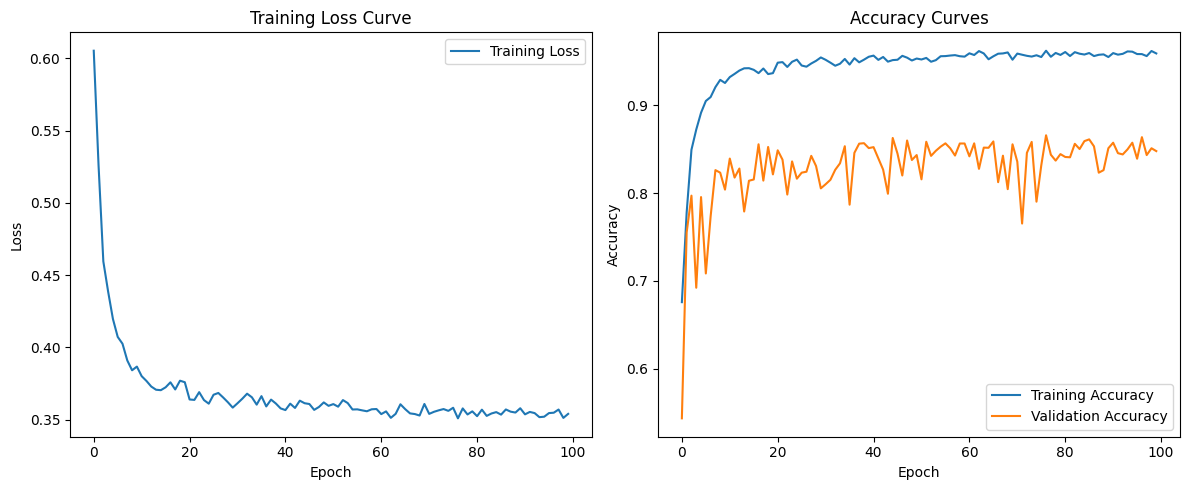


#### Testing on D. melanogaster...
Encoding sequences...
Node feature shape: (11580, 4096, 3)


C:\Users\soroushstr\Downloads\CNmodel.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_name, map_location=device)


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 24285020160 bytes.

In [6]:
if __name__ == '__main__':
        #############    Train on C. elegans   ########################
        print("#### Training on C. elegans...")
        main()
        data = Biodata.Biodata(fasta_file="elegans_genes.fasta",
                               label_file="elegans_labels.txt",
                               feature_file=None
                               )
        dataset = data.encode(thread=48)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
        CNmodel.train(dataset, model, weighted_sampling=True)
        # ##############   Test on D. melanogaster    ####################
        print("\n#### Testing on D. melanogaster...")
        data2 = Biodata.Biodata(fasta_file="melanogaster_genes.fasta",
                               label_file="melanogaster_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on H. sapiens    ####################
        print("\n#### Testing on H. sapiens...")
        data2 = Biodata.Biodata(fasta_file="sapiens_genes.fasta",
                               label_file="sapiens_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)
        # ##############   Test on M. maripaludis    ####################
        print("\n#### Testing on M. maripaludis...")
        data2 = Biodata.Biodata(fasta_file="maripaludis_genes.fasta",
                               label_file="maripaludis_labels.txt",
                               feature_file=None
                               )
        torch.cuda.empty_cache()
        data1 = data2.encode(thread=48)
        CNmodel.test(data1)

In [6]:
# ##############   Test on D. melanogaster    ####################
print("\n#### Testing on D. melanogaster...")
data2 = Biodata.Biodata(fasta_file="melanogaster_genes.fasta",
                       label_file="melanogaster_labels.txt",
                       feature_file=None
                       )
torch.cuda.empty_cache()
data1 = data2.encode(thread=48)
CNmodel.test(data1)


#### Testing on D. melanogaster...
Encoding sequences...
Node feature shape: (11580, 4096, 3)


C:\Users\soroushstr\Downloads\CNmodel.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_name, map_location=device)
c:\users\soroushstr\appdata\l

TP: 34, FN: 2249, FP: 48, TN: 3459
SN: 0.014892685063512922, SP: 0.9863130881094953, ACC: 0.6032815198618308, AUC: 0.014688850195235584


# Train on D. melanogaster; small datasets; K=3, d=3; tuned hyperparameters

#### Training on D. melanogaster...
Encoding sequences...
Node feature shape: (400, 4096, 3)


c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'y', 'edge_index', 'x_dst', 'x_src'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


trainset length:  320
testset length:  80
Epoch 1/100 | Loss: 0.6998 | Train Acc: 0.5250 | Val Acc: 0.4125
Epoch 2/100 | Loss: 0.6941 | Train Acc: 0.5406 | Val Acc: 0.3875
Epoch 3/100 | Loss: 0.6864 | Train Acc: 0.5938 | Val Acc: 0.4500
Epoch 4/100 | Loss: 0.6738 | Train Acc: 0.5844 | Val Acc: 0.4250
Epoch 5/100 | Loss: 0.6494 | Train Acc: 0.6344 | Val Acc: 0.5875
Epoch 6/100 | Loss: 0.6554 | Train Acc: 0.6125 | Val Acc: 0.7250
Epoch 7/100 | Loss: 0.6463 | Train Acc: 0.6500 | Val Acc: 0.4125
Epoch 8/100 | Loss: 0.6392 | Train Acc: 0.6188 | Val Acc: 0.6125
Epoch 9/100 | Loss: 0.5985 | Train Acc: 0.6813 | Val Acc: 0.6125
Epoch 10/100 | Loss: 0.5544 | Train Acc: 0.7719 | Val Acc: 0.6250
Epoch 11/100 | Loss: 0.5410 | Train Acc: 0.7875 | Val Acc: 0.6875
Epoch 12/100 | Loss: 0.5077 | Train Acc: 0.7875 | Val Acc: 0.6875
Epoch 13/100 | Loss: 0.4504 | Train Acc: 0.8625 | Val Acc: 0.6125
Epoch 14/100 | Loss: 0.4155 | Train Acc: 0.9094 | Val Acc: 0.7000
Epoch 15/100 | Loss: 0.3780 | Train Acc: 0.

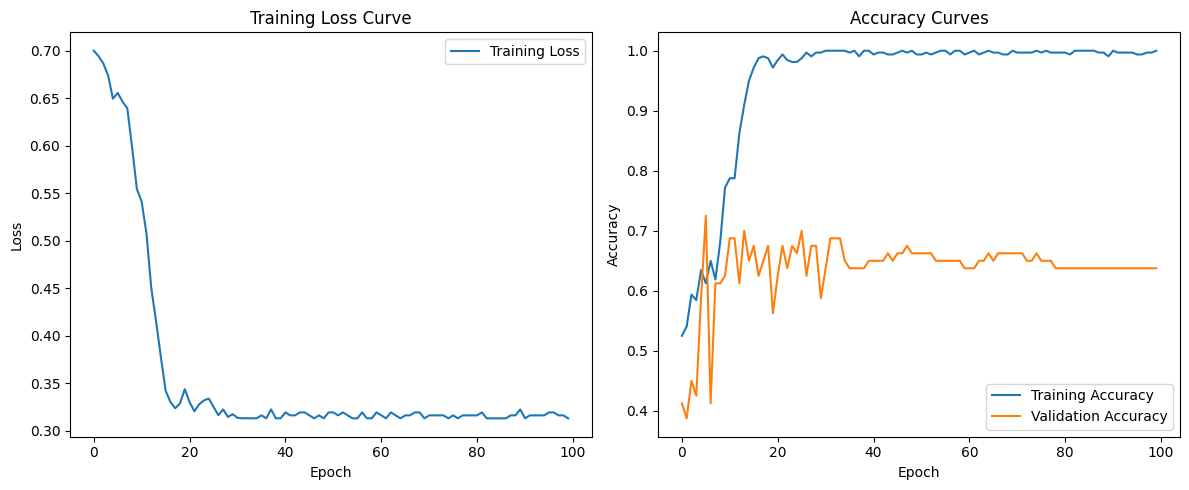

model(
  (pnode_d): Linear(in_features=12288, out_features=12288, bias=True)
  (fnode_d): Linear(in_features=64, out_features=192, bias=True)
  (gconvs_1): ModuleList(
    (0): SAGEConv((3, 3), 128, aggr=mean)
    (1): SAGEConv((128, 128), 128, aggr=mean)
  )
  (gconvs_2): ModuleList(
    (0): SAGEConv((128, 3), 128, aggr=mean)
    (1): SAGEConv((128, 128), 128, aggr=mean)
  )
  (lns): ModuleList(
    (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (convs): ModuleList(
    (0-1): 2 x Conv1d(128, 128, kernel_size=(8,), stride=(1,))
  )
  (d1): Linear(in_features=522496, out_features=100, bias=True)
  (d2): Linear(in_features=100, out_features=2, bias=True)
)

In [6]:
#############    Train on D. melanogaster   ########################
print("#### Training on D. melanogaster...")
main()
data = Biodata.Biodata(fasta_file=".\\Check_Datasets\\melanogaster_genes.fasta",
                       label_file=".\\Check_Datasets\\melanogaster_labels.txt",
                       feature_file=None
                       )
dataset = data.encode(thread=48)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
CNmodel.train(dataset, model, weighted_sampling=True)

In [8]:
# ##############   Test on C. elegans    ####################
print("\n#### Testing on C. elegans...")
data2 = Biodata.Biodata(fasta_file=".\\Check_Datasets\\elegans_genes.fasta",
                       label_file=".\\Check_Datasets\\elegans_labels.txt",
                       feature_file=None
                       )
torch.cuda.empty_cache()
data1 = data2.encode(thread=48)
CNmodel.test(data1)


#### Testing on C. elegans...
Encoding sequences...
Node feature shape: (400, 4096, 3)
TP: 0, FN: 200, FP: 0, TN: 200
SN: 0.0, SP: 1.0, ACC: 0.5, AUC: 0.0


{'TP': 0,
 'FN': 200,
 'FP': 0,
 'TN': 200,
 'SN': 0.0,
 'SP': 1.0,
 'ACC': 0.5,
 'AUC': 0.0}

# Train on D. melanogaster; small datasets; K=2, d=2; tuned hyperparameters

#### Training on D. melanogaster...
Encoding sequences...
Node feature shape: (400, 256, 2)


c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'x_src', 'edge_index', 'y', 'x_dst'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


trainset length:  320
testset length:  80
Epoch 1/100 | Loss: 0.6929 | Train Acc: 0.4938 | Val Acc: 0.6125
Epoch 2/100 | Loss: 0.6895 | Train Acc: 0.5469 | Val Acc: 0.4750
Epoch 3/100 | Loss: 0.6833 | Train Acc: 0.5719 | Val Acc: 0.4250
Epoch 4/100 | Loss: 0.6707 | Train Acc: 0.5969 | Val Acc: 0.4375
Epoch 5/100 | Loss: 0.6680 | Train Acc: 0.6000 | Val Acc: 0.5500
Epoch 6/100 | Loss: 0.6652 | Train Acc: 0.5844 | Val Acc: 0.4125
Epoch 7/100 | Loss: 0.6603 | Train Acc: 0.6312 | Val Acc: 0.4625
Epoch 8/100 | Loss: 0.6576 | Train Acc: 0.6062 | Val Acc: 0.5625
Epoch 9/100 | Loss: 0.6550 | Train Acc: 0.6344 | Val Acc: 0.4750
Epoch 10/100 | Loss: 0.6613 | Train Acc: 0.6094 | Val Acc: 0.5500
Epoch 11/100 | Loss: 0.6351 | Train Acc: 0.6594 | Val Acc: 0.5625
Epoch 12/100 | Loss: 0.6497 | Train Acc: 0.6188 | Val Acc: 0.5750
Epoch 13/100 | Loss: 0.6783 | Train Acc: 0.5969 | Val Acc: 0.4875
Epoch 14/100 | Loss: 0.6663 | Train Acc: 0.6062 | Val Acc: 0.4500
Epoch 15/100 | Loss: 0.6560 | Train Acc: 0.

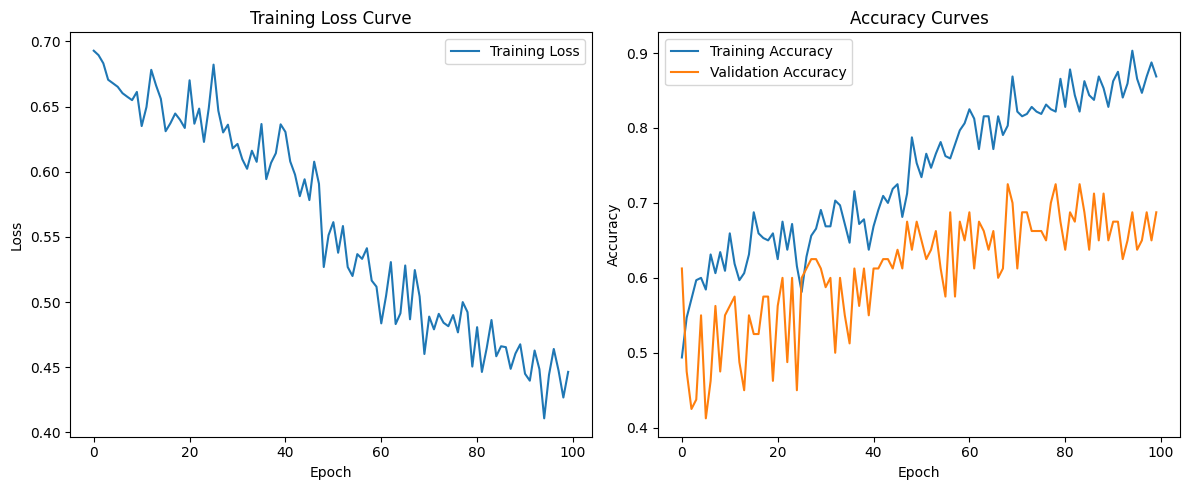

model(
  (pnode_d): Linear(in_features=512, out_features=768, bias=True)
  (fnode_d): Linear(in_features=16, out_features=48, bias=True)
  (gconvs_1): ModuleList(
    (0): SAGEConv((3, 3), 128, aggr=mean)
    (1): SAGEConv((128, 128), 128, aggr=mean)
  )
  (gconvs_2): ModuleList(
    (0): SAGEConv((128, 3), 128, aggr=mean)
    (1): SAGEConv((128, 128), 128, aggr=mean)
  )
  (lns): ModuleList(
    (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (convs): ModuleList(
    (0-1): 2 x Conv1d(128, 128, kernel_size=(8,), stride=(1,))
  )
  (d1): Linear(in_features=30976, out_features=100, bias=True)
  (d2): Linear(in_features=100, out_features=2, bias=True)
)

In [6]:
#############    Train on D. melanogaster   ########################
print("#### Training on D. melanogaster...")
main()
data = Biodata.Biodata(fasta_file=".\\Check_Datasets\\melanogaster_genes.fasta",
                       label_file=".\\Check_Datasets\\melanogaster_labels.txt",
                       feature_file=None
                       )
dataset = data.encode(thread=48)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
CNmodel.train(dataset, model, weighted_sampling=True)

In [7]:
# ##############   Test on C. elegans    ####################
print("\n#### Testing on C. elegans...")
data2 = Biodata.Biodata(fasta_file=".\\Check_Datasets\\elegans_genes.fasta",
                       label_file=".\\Check_Datasets\\elegans_labels.txt",
                       feature_file=None
                       )
torch.cuda.empty_cache()
data1 = data2.encode(thread=48)
CNmodel.test(data1)


#### Testing on C. elegans...
Encoding sequences...
Node feature shape: (400, 256, 2)


C:\Users\soroushstr\Downloads\CNmodel.py:261: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_name, map_location=device)


TP: 80, FN: 120, FP: 29, TN: 171
SN: 0.4, SP: 0.855, ACC: 0.6275, AUC: 0.342


{'TP': 80,
 'FN': 120,
 'FP': 29,
 'TN': 171,
 'SN': 0.4,
 'SP': 0.855,
 'ACC': 0.6275,
 'AUC': 0.342}

# Train on D. melanogaster; small datasets; K=2, d=2, epoch=200; tuned hyperparameters

#### Training on D. melanogaster...
Encoding sequences...
Node feature shape: (400, 256, 2)
trainset length:  320
testset length:  80


c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'x_dst', 'y', 'x_src', 'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


Epoch 1/200 | Loss: 0.6947 | Train Acc: 0.5062 | Val Acc: 0.3875
Epoch 2/200 | Loss: 0.6858 | Train Acc: 0.5625 | Val Acc: 0.4125
Epoch 3/200 | Loss: 0.6848 | Train Acc: 0.5656 | Val Acc: 0.4000
Epoch 4/200 | Loss: 0.6946 | Train Acc: 0.5188 | Val Acc: 0.5500
Epoch 5/200 | Loss: 0.6778 | Train Acc: 0.6031 | Val Acc: 0.4000
Epoch 6/200 | Loss: 0.6935 | Train Acc: 0.5031 | Val Acc: 0.4375
Epoch 7/200 | Loss: 0.6815 | Train Acc: 0.5594 | Val Acc: 0.6375
Epoch 8/200 | Loss: 0.6806 | Train Acc: 0.5750 | Val Acc: 0.4125
Epoch 9/200 | Loss: 0.6785 | Train Acc: 0.5781 | Val Acc: 0.4250
Epoch 10/200 | Loss: 0.6761 | Train Acc: 0.5969 | Val Acc: 0.4375
Epoch 11/200 | Loss: 0.6426 | Train Acc: 0.6875 | Val Acc: 0.4250
Epoch 12/200 | Loss: 0.6620 | Train Acc: 0.6219 | Val Acc: 0.4250
Epoch 13/200 | Loss: 0.6834 | Train Acc: 0.5750 | Val Acc: 0.5625
Epoch 14/200 | Loss: 0.6485 | Train Acc: 0.6406 | Val Acc: 0.4750
Epoch 15/200 | Loss: 0.6259 | Train Acc: 0.6875 | Val Acc: 0.5000
Epoch 16/200 | Loss

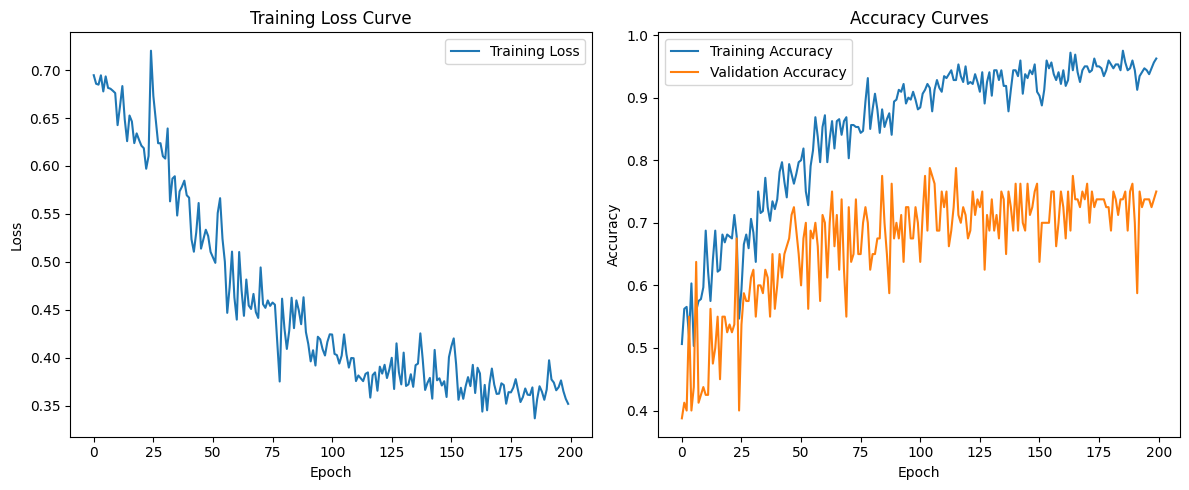

model(
  (pnode_d): Linear(in_features=512, out_features=768, bias=True)
  (fnode_d): Linear(in_features=16, out_features=48, bias=True)
  (gconvs_1): ModuleList(
    (0): SAGEConv((3, 3), 128, aggr=mean)
    (1): SAGEConv((128, 128), 128, aggr=mean)
  )
  (gconvs_2): ModuleList(
    (0): SAGEConv((128, 3), 128, aggr=mean)
    (1): SAGEConv((128, 128), 128, aggr=mean)
  )
  (lns): ModuleList(
    (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (convs): ModuleList(
    (0-1): 2 x Conv1d(128, 128, kernel_size=(8,), stride=(1,))
  )
  (d1): Linear(in_features=30976, out_features=100, bias=True)
  (d2): Linear(in_features=100, out_features=2, bias=True)
)

In [6]:
#############    Train on D. melanogaster   ########################
print("#### Training on D. melanogaster...")
main()
data = Biodata.Biodata(fasta_file=".\\Check_Datasets\\melanogaster_genes.fasta",
                       label_file=".\\Check_Datasets\\melanogaster_labels.txt",
                       feature_file=None
                       )
dataset = data.encode(thread=48)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
CNmodel.train(dataset, model, weighted_sampling=True)

In [7]:
# ##############   Test on C. elegans    ####################
print("\n#### Testing on C. elegans...")
data2 = Biodata.Biodata(fasta_file=".\\Check_Datasets\\elegans_genes.fasta",
                       label_file=".\\Check_Datasets\\elegans_labels.txt",
                       feature_file=None
                       )
torch.cuda.empty_cache()
data1 = data2.encode(thread=48)
CNmodel.test(data1)


#### Testing on C. elegans...
Encoding sequences...
Node feature shape: (400, 256, 2)


C:\Users\soroushstr\Downloads\CNmodel.py:261: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_name, map_location=device)


TP: 121, FN: 79, FP: 37, TN: 163
SN: 0.605, SP: 0.815, ACC: 0.71, AUC: 0.493075


{'TP': 121,
 'FN': 79,
 'FP': 37,
 'TN': 163,
 'SN': 0.605,
 'SP': 0.815,
 'ACC': 0.71,
 'AUC': 0.493075}

# Train on D. melanogaster; Balanced1000 datasets; K=2, d=2, epoch=100; tuned hyperparameters

#### Training on D. melanogaster...
Encoding sequences...
Node feature shape: (1000, 256, 2)


c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


trainset length:  800
testset length:  200


c:\users\soroushstr\appdata\local\programs\python\python38\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'x_src', 'edge_index', 'x_dst', 'y'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


Epoch 1/100 | Loss: 0.6946 | Train Acc: 0.5088 | Val Acc: 0.5600
Epoch 2/100 | Loss: 0.6873 | Train Acc: 0.5188 | Val Acc: 0.5700
Epoch 3/100 | Loss: 0.6702 | Train Acc: 0.6150 | Val Acc: 0.6000
Epoch 4/100 | Loss: 0.6520 | Train Acc: 0.6300 | Val Acc: 0.5850
Epoch 5/100 | Loss: 0.6567 | Train Acc: 0.6212 | Val Acc: 0.6050
Epoch 6/100 | Loss: 0.6295 | Train Acc: 0.6587 | Val Acc: 0.6150
Epoch 7/100 | Loss: 0.6499 | Train Acc: 0.6212 | Val Acc: 0.6100
Epoch 8/100 | Loss: 0.6394 | Train Acc: 0.6412 | Val Acc: 0.6150
Epoch 9/100 | Loss: 0.6437 | Train Acc: 0.6325 | Val Acc: 0.6150
Epoch 10/100 | Loss: 0.6313 | Train Acc: 0.6350 | Val Acc: 0.6300
Epoch 11/100 | Loss: 0.6341 | Train Acc: 0.6462 | Val Acc: 0.6600
Epoch 12/100 | Loss: 0.6303 | Train Acc: 0.6388 | Val Acc: 0.6500
Epoch 13/100 | Loss: 0.6158 | Train Acc: 0.6675 | Val Acc: 0.6550
Epoch 14/100 | Loss: 0.6035 | Train Acc: 0.6963 | Val Acc: 0.6350
Epoch 15/100 | Loss: 0.6207 | Train Acc: 0.6763 | Val Acc: 0.6550
Epoch 16/100 | Loss

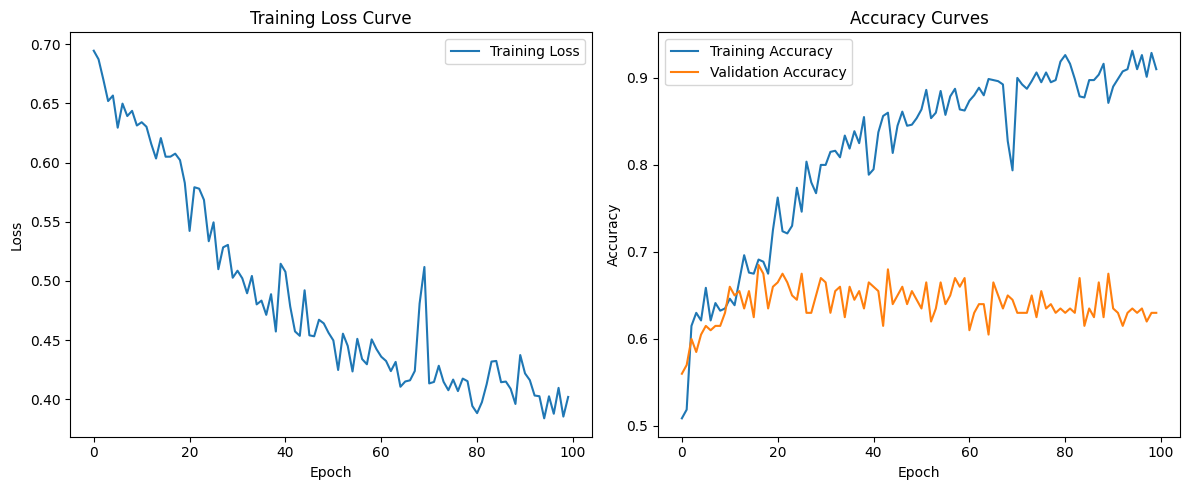

model(
  (pnode_d): Linear(in_features=512, out_features=768, bias=True)
  (fnode_d): Linear(in_features=16, out_features=48, bias=True)
  (gconvs_1): ModuleList(
    (0): SAGEConv((3, 3), 128, aggr=mean)
    (1): SAGEConv((128, 128), 128, aggr=mean)
  )
  (gconvs_2): ModuleList(
    (0): SAGEConv((128, 3), 128, aggr=mean)
    (1): SAGEConv((128, 128), 128, aggr=mean)
  )
  (lns): ModuleList(
    (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (convs): ModuleList(
    (0-1): 2 x Conv1d(128, 128, kernel_size=(8,), stride=(1,))
  )
  (d1): Linear(in_features=30976, out_features=100, bias=True)
  (d2): Linear(in_features=100, out_features=2, bias=True)
)

In [6]:
#############    Train on D. melanogaster   ########################
print("#### Training on D. melanogaster...")
main()
data = Biodata.Biodata(fasta_file=".\\Data\\Balanced1000_Datasets\\melanogaster_genes.fasta",
                       label_file=".\\Data\\Balanced1000_Datasets\\melanogaster_labels.txt",
                       feature_file=None
                       )
torch.cuda.empty_cache()
dataset = data.encode(thread=48)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
CNmodel.train(dataset, model, weighted_sampling=True)

In [7]:
# ##############   Test on C. elegans    ####################
print("\n#### Testing on C. elegans...")
data2 = Biodata.Biodata(fasta_file=".\\Data\\Balanced1000_Datasets\\elegans_genes.fasta",
                       label_file=".\\Data\\Balanced1000_Datasets\\elegans_labels.txt",
                       feature_file=None
                       )
torch.cuda.empty_cache()
data1 = data2.encode(thread=48)
CNmodel.test(data1)


#### Testing on C. elegans...
Encoding sequences...
Node feature shape: (1000, 256, 2)


C:\Users\soroushstr\Downloads\CNmodel.py:261: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_name, map_location=device)


TP: 214, FN: 286, FP: 248, TN: 252
SN: 0.428, SP: 0.504, ACC: 0.466, AUC: 0.215712


{'TP': 214,
 'FN': 286,
 'FP': 248,
 'TN': 252,
 'SN': 0.428,
 'SP': 0.504,
 'ACC': 0.466,
 'AUC': 0.215712}

# Train on D. melanogaster; Biased1000 datasets; K=2, d=2, epoch=100; tuned hyperparameters

#### Training on D. melanogaster...
Encoding sequences...
Node feature shape: (1000, 256, 2)
trainset length:  800
testset length:  200
Epoch 1/100 | Loss: 0.6932 | Train Acc: 0.5112 | Val Acc: 0.8350
Epoch 2/100 | Loss: 0.6894 | Train Acc: 0.5238 | Val Acc: 0.8250
Epoch 3/100 | Loss: 0.6814 | Train Acc: 0.5887 | Val Acc: 0.5300
Epoch 4/100 | Loss: 0.6814 | Train Acc: 0.5625 | Val Acc: 0.4400
Epoch 5/100 | Loss: 0.6611 | Train Acc: 0.6062 | Val Acc: 0.6700
Epoch 6/100 | Loss: 0.6419 | Train Acc: 0.6425 | Val Acc: 0.6450
Epoch 7/100 | Loss: 0.6138 | Train Acc: 0.6813 | Val Acc: 0.6950
Epoch 8/100 | Loss: 0.6350 | Train Acc: 0.6362 | Val Acc: 0.5550
Epoch 9/100 | Loss: 0.6421 | Train Acc: 0.6288 | Val Acc: 0.6400
Epoch 10/100 | Loss: 0.6132 | Train Acc: 0.6613 | Val Acc: 0.7600
Epoch 11/100 | Loss: 0.6143 | Train Acc: 0.6763 | Val Acc: 0.6950
Epoch 12/100 | Loss: 0.6185 | Train Acc: 0.6763 | Val Acc: 0.6800
Epoch 13/100 | Loss: 0.6189 | Train Acc: 0.6725 | Val Acc: 0.6500
Epoch 14/100 | 

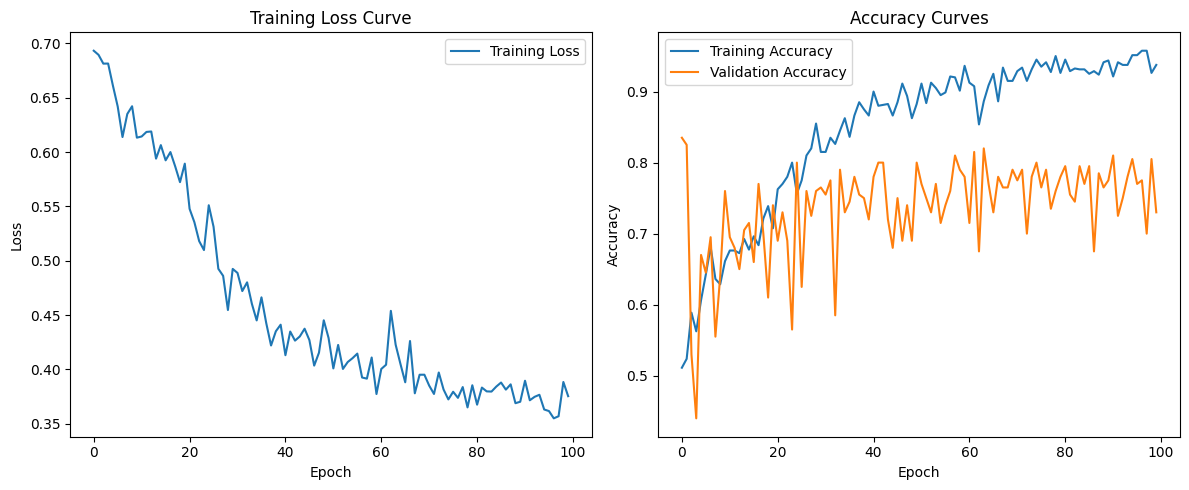

model(
  (pnode_d): Linear(in_features=512, out_features=768, bias=True)
  (fnode_d): Linear(in_features=16, out_features=48, bias=True)
  (gconvs_1): ModuleList(
    (0): SAGEConv((3, 3), 128, aggr=mean)
    (1): SAGEConv((128, 128), 128, aggr=mean)
  )
  (gconvs_2): ModuleList(
    (0): SAGEConv((128, 3), 128, aggr=mean)
    (1): SAGEConv((128, 128), 128, aggr=mean)
  )
  (lns): ModuleList(
    (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (convs): ModuleList(
    (0-1): 2 x Conv1d(128, 128, kernel_size=(8,), stride=(1,))
  )
  (d1): Linear(in_features=30976, out_features=100, bias=True)
  (d2): Linear(in_features=100, out_features=2, bias=True)
)

In [8]:
#############    Train on D. melanogaster   ########################
print("#### Training on D. melanogaster...")
main()
data = Biodata.Biodata(fasta_file=".\\Data\\Biased1000_Datasets\\melanogaster_genes.fasta",
                       label_file=".\\Data\\Biased1000_Datasets\\melanogaster_labels.txt",
                       feature_file=None
                       )
torch.cuda.empty_cache()
dataset = data.encode(thread=48)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNmodel.model(label_num=2, other_feature_dim=0).to(device)
CNmodel.train(dataset, model, weighted_sampling=True)

In [ ]:
# ##############   Test on C. elegans    ####################
print("\n#### Testing on C. elegans...")
data2 = Biodata.Biodata(fasta_file=".\\Data\\Biased1000_Datasets\\elegans_genes.fasta",
                       label_file=".\\Data\\Biased1000_Datasets\\elegans_labels.txt",
                       feature_file=None
                       )
torch.cuda.empty_cache()
data1 = data2.encode(thread=48)
CNmodel.test(data1)


#### Testing on C. elegans...
Encoding sequences...
Node feature shape: (1000, 256, 2)
TP: 0, FN: 200, FP: 0, TN: 800
SN: 0.0, SP: 1.0, ACC: 0.8, AUC: 0.0


{'TP': 0,
 'FN': 200,
 'FP': 0,
 'TN': 800,
 'SN': 0.0,
 'SP': 1.0,
 'ACC': 0.8,
 'AUC': 0.0}